In [8]:
import pandas as pd
data = pd.read_excel("Data.xlsx", "Data", parse_dates=True, index_col=[0])
data = data.sort_index(ascending=True)
data

,SPX Index,NWHLNYHI Index,NWHLNYLO Index,VIX Index,OPIXEQTC Index,OPIXEQTP Index,PCRTEQTY Index,LT31TRUU Index,LT01TRUU Index,LF98OAS Index,LUACOAS Index,SUM INX Index
DATES,,,,,,,,,,,,
1999-04-30,1335.18,70.0,20.0,25.07,445888.0,165141.0,0.36000,NaN,150.94,4.44,1.02,NaN
1999-05-03,1354.63,78.0,19.0,24.15,389652.0,162475.0,0.42000,NaN,151.00,NaN,NaN,NaN
1999-05-04,1332.00,112.0,15.0,25.62,399325.0,164904.0,0.41000,NaN,150.96,NaN,NaN,NaN
1999-05-05,1347.31,63.0,18.0,25.19,534134.0,208823.0,0.45000,NaN,151.04,NaN,NaN,NaN
1999-05-06,1332.05,87.0,27.0,27.44,469627.0,168528.0,0.36000,NaN,150.82,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-08,5202.39,98.0,17.0,15.19,1116520.0,717845.0,0.83003,204.1395,278.41,2.98,0.87,NaN
2024-04-09,5209.91,83.0,8.0,14.98,1265846.0,917304.0,0.82560,204.7355,278.68,2.99,0.87,NaN
2024-04-10,5160.64,23.0,43.0,15.80,1140865.0,717541.0,0.95780,202.5551,277.56,2.92,0.87,NaN


<Axes: xlabel='DATES'>

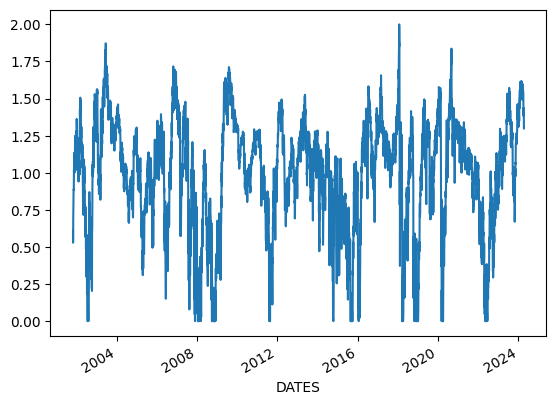

In [31]:
from typing import Any


class MA:
    
    def __init__(self, window: int = 120) -> None:
        self.window = window
        
        
    def __call__(self, series: pd.Series) -> Any:
        return series.rolling(self.window).mean()
    
    


spx = data["SPX Index"].dropna()
signal = spx / MA(125)(spx) - 1
window = 21*12*2
mean = signal.rolling(window).mean()
std = signal.rolling(window).std()
nor = (signal - mean) / std
nor = nor.clip(lower=-3, upper=3) / 3 + 1
# nor = nor * (-1) + 2
# signal.plot()
nor.plot()
        

In [27]:
spx

DATES
1999-04-30    1335.18
1999-05-03    1354.63
1999-05-04    1332.00
1999-05-05    1347.31
1999-05-06    1332.05
               ...   
2024-04-08    5202.39
2024-04-09    5209.91
2024-04-10    5160.64
2024-04-11    5199.06
2024-04-12    5123.41
Name: SPX Index, Length: 6279, dtype: float64

In [28]:
nor.loc["2020-11-16":]

DATES
2020-11-16    1.359287
2020-11-17    1.324643
2020-11-18    1.255996
2020-11-19    1.267807
2020-11-20    1.225467
                ...   
2024-04-08    1.424049
2024-04-09    1.422261
2024-04-10    1.357961
2024-04-11    1.391413
2024-04-12    1.298653
Name: SPX Index, Length: 856, dtype: float64